<a href="https://colab.research.google.com/github/samuelkoGithub/machineLearningJourney/blob/main/Keras_Mnist_myCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/10
240/240 - 23s - loss: 0.4196 - accuracy: 0.8759 - val_loss: 0.1115 - val_accuracy: 0.9683 - 23s/epoch - 98ms/step
Epoch 2/10
240/240 - 23s - loss: 0.1107 - accuracy: 0.9659 - val_loss: 0.0661 - val_accuracy: 0.9797 - 23s/epoch - 95ms/step
Epoch 3/10
240/240 - 23s - loss: 0.0770 - accuracy: 0.9760 - val_loss: 0.0583 - val_accuracy: 0.9833 - 23s/epoch - 95ms/step
Epoch 4/10
240/240 - 23s - loss: 0.0601 - accuracy: 0.9815 - val_loss: 0.0487 - val_accuracy: 0.9850 - 23s/epoch - 94ms/step
Epoch 5/10
240/240 - 23s - loss: 0.0525 - accuracy: 0.9824 - val_loss: 0.0456 - val_accuracy: 0.9869 - 23s/epoch - 94ms/step
Epoch 6/10
240/240 - 23s - loss: 0.0449 - accuracy: 0.9858 - val_loss: 0.0426 - val_accuracy: 0.9875 - 23s/epoch - 94ms/step
Epoch 7/10
240/240 - 23s - loss: 0.0402 - accuracy: 0.9872 - val_loss: 0.0429 - val_accuracy: 0.9871 - 23s/epoch - 96ms/step
Epoch 8/10
240/240 - 23s - loss: 0.0336 - accuracy: 0.9888 - val_loss: 0.0387 - val_accuracy: 0.9886 - 23s/epoch - 95ms/step


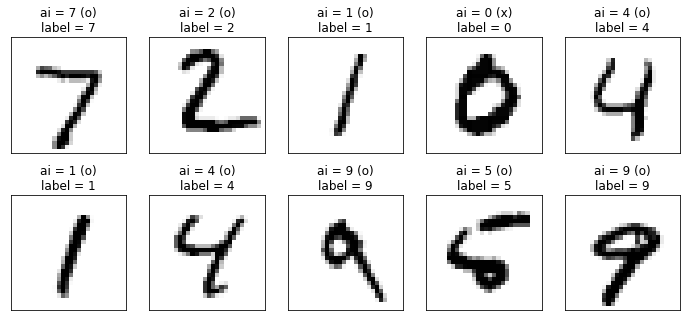

In [ ]:
import numpy as np
from keras.utils import np_utils
np.random.seed(10)
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dropout,Flatten,Dense

def show_images_labels_predictions(images,labels,
                                  predictions,start_id,num=10):
    plt.gcf().set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        #顯示黑白圖片
        ax.imshow(images[start_id], cmap='binary')
        
#---------------- Modified by Samuel KO - 19 March 2022 ------------------------
#---------------- Update Tensorflow from 2.0 to 2.5 ----------------------------

       # 有 AI 預測結果資料, 才在標題顯示預測結果
        if( len(predictions) > 0 ) :
            #title = 'ai = ' + str(predictions[i])
            title = 'ai = '+ str(predictions[i].tolist().index(1))
            # 預測正確顯示(o), 錯誤顯示(x)
            title += (' (o)' if predictions[i].any() == labels[i].any() else ' (x)') 
            title += '\nlabel = ' + str(labels[i])
        # 沒有 AI 預測結果資料, 只在標題顯示真實數值
        else :
            title = 'label = ' + str(labels[i])
     
        # X, Y 軸不顯示刻度    
        ax.set_title(title,fontsize=12) 
        ax.set_xticks([]);ax.set_yticks([])        
        start_id+=1 
#------------------------------------------------------------------------------- 
    plt.show()

#建立訓練資料和測試資料，包括訓練特徵集、訓練標籤和測試特徵集、測試標籤	
(train_feature, train_label),\
(test_feature, test_label) = mnist.load_data()  

#將 Features 特徵值換為 60000*28*28*1 的 4 維矩陣
train_feature_vector =train_feature.reshape(len(train_feature), 28,28,1).astype('float32')
test_feature_vector = test_feature.reshape(len( test_feature), 28,28,1).astype('float32')

#Features 特徵值標準化
train_feature_normalize = train_feature_vector/255
test_feature_normalize = test_feature_vector/255

#label 轉換為 One-Hot Encoding 編碼
train_label_onehot = np_utils.to_categorical(train_label)
test_label_onehot = np_utils.to_categorical(test_label)

#建立模型
model = Sequential()
#建立卷積層1
model.add(Conv2D(filters=10, 
                 kernel_size=(3,3),
                 padding='same',
                 input_shape=(28,28,1), 
                 activation='relu'))

#建立池化層1
model.add(MaxPooling2D(pool_size=(2, 2))) #(10,14,14)

#建立卷積層2
model.add(Conv2D(filters=20, 
                 kernel_size=(3,3),  
                 padding='same',
                 activation='relu'))

#建立池化層2
model.add(MaxPooling2D(pool_size=(2, 2))) #(20,7,7)

# Dropout層防止過度擬合，斷開比例:0.2
model.add(Dropout(0.2))

#建立平坦層：20*7*7=980 個神經元
model.add(Flatten()) 

#建立隱藏層
model.add(Dense(units=256, activation='relu'))

#建立輸出層
model.add(Dense(units=10,activation='softmax'))

#定義訓練方式
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

#以(train_feature_normalize,train_label_onehot)資料訓練，
#訓練資料保留 20% 作驗證,訓練10次、每批次讀取200筆資料，顯示簡易訓練過程
train_history =model.fit(x=train_feature_normalize,
                         y=train_label_onehot,validation_split=0.2, 
                         epochs=10, batch_size=200,verbose=2)

#評估準確率
scores = model.evaluate(test_feature_normalize, test_label_onehot)
print('\n準確率=',scores[1])
print('\n')
#---------------- Update Tensorflow from 2.0 to 2.5 ----------------------------

#預測
#prediction=model.predict_classes(test_feature_normalize)
prediction=(model.predict(test_feature_normalize) > 0.5).astype("float32")

#顯示圖像、預測值、真實值 
show_images_labels_predictions(test_feature,test_label,prediction,0)